# PCA from scratch

По этой статье: https://habr.com/ru/articles/304214/

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

In [ ]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
y

array([ 4.56967196,  5.071352  ,  5.89793273,  7.91558847,  9.96789828,
       12.85321708, 15.70358191, 15.353679  , 16.10769041, 17.48975731])

In [ ]:
X

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 4.56967196,  5.071352  ,  5.89793273,  7.91558847,  9.96789828,
        12.85321708, 15.70358191, 15.353679  , 16.10769041, 17.48975731]])

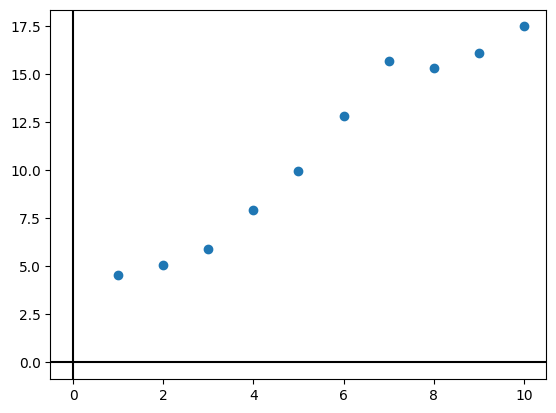

In [ ]:
plt.scatter(x, y)
plt.axhline(y=0.0, color='black')
plt.axvline(x=0.0, color='black')

В данной выборке у нас имеются два признака, сильно коррелирующие друг с другом. С помощью алгоритма PCA мы сможем легко найти признак-комбинацию и, ценой части информации, выразить оба этих признака одним новым.

Отцентрируем нашу выборку: линейно сдвинем ее так, чтобы средние значения признаков были равны 0

In [ ]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())

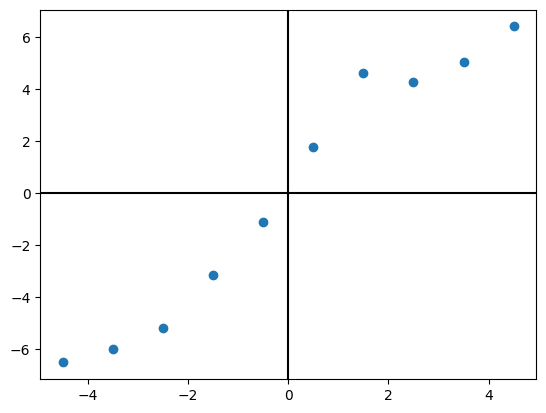

In [ ]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.axhline(y=0.0, color='black')
plt.axvline(x=0.0, color='black')

Построим ковариационную матрицу -т.е. матрицу корреляций между признаками:

In [ ]:
covmat = np.cov(Xcentered)

В матрице по главной диагонали будут дисперсии признаков, а в остальных ячейках – ковариации соответствующих пар признаков:


In [ ]:
covmat

array([[ 9.16666667, 14.83684263],
       [14.83684263, 25.08215715]])

In [ ]:
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

Variance of X:  9.166666666666666
Variance of Y:  25.082157148509427
Covariance X and Y:  14.836842634700982


Найдем собственные вектора и значения:

In [ ]:
eigenvals, eigenvecs = np.linalg.eig(covmat)

In [ ]:
eigenvals

array([ 0.28821255, 33.96061126])

In [ ]:
eigenvecs

array([[-0.85809582, -0.5134896 ],
       [ 0.5134896 , -0.85809582]])

Отсортируем собственные значения по убыванию:

In [ ]:
sorted_index = np.argsort(eigenvals)[::-1]
sorted_eigenvalues = eigenvals[sorted_index]
sorted_eigenvectors = eigenvecs[:,sorted_index]

In [ ]:
sorted_eigenvectors

array([[-0.5134896 , -0.85809582],
       [-0.85809582,  0.5134896 ]])

Посмотрим, сколько дисперсии объясняет каждое значение:

In [ ]:
eig_vals_total = sum(sorted_eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

In [ ]:
print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

Explained variance: [99.16  0.84]
Cumulative explained variance: [ 99.16 100.  ]


Снизим размерность до 1:

In [ ]:
n_components = 1
W = sorted_eigenvectors[:n_components, :] # Projection matrix

print(W.shape)

(1, 2)


In [ ]:
W

array([[-0.5134896 , -0.85809582]])

Трансформируем данные:

In [ ]:
X_reduced = np.dot(W, np.array(Xcentered))

In [ ]:
X_reduced

array([[ 7.90837537,  6.96439623,  5.74162117,  3.49678962,  1.22222156,
        -1.76714804, -4.72652377, -4.93976315, -6.10026678, -7.79970221]])

Сравним с PCA из sklearn:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X.transpose())

In [ ]:
XPCAreduced

array([[-7.90837537],
       [-6.96439623],
       [-5.74162117],
       [-3.49678962],
       [-1.22222156],
       [ 1.76714804],
       [ 4.72652377],
       [ 4.93976315],
       [ 6.10026678],
       [ 7.79970221]])

In [ ]:
print('Projection: ', pca.components_, W)
print('Explained variance ratio: ', pca.explained_variance_ratio_, explained_variance)

Projection:  [[0.5134896  0.85809582]] [[-0.5134896  -0.85809582]]
Explained variance ratio:  [0.99158475] [99.16  0.84]
